In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import copy
from matplotlib import pyplot as plt
import seaborn as sns

import world_model
import planning_cases

sns.set(style="ticks")
sns.set_context(context="paper")

In [2]:
wm = world_model.WorldModelWrapper()
wm.load_model()

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
df, _ = planning_cases.model_quality_analysis(rollouts=500,
                                           wmr=wm,
                                           steps=100,
                                           visualize=False
                                          )

/home/joshua/anaconda3/envs/ai_gym/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [4]:
print(df.describe())
print(df.info())
df.head()

               step          rmse
count  50601.000000  50601.000000
mean      50.000000      2.070853
std       29.155048      2.003104
min        0.000000      0.000000
25%       25.000000      0.458052
50%       50.000000      1.552545
75%       75.000000      3.136588
max      100.000000     24.262175
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50601 entries, 0 to 100
Data columns (total 3 columns):
rollout    50601 non-null object
step       50601 non-null float64
rmse       50601 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.5+ MB
None


,rollout,step,rmse
0,0,0.0,0.000000
1,0,1.0,0.016511
2,0,2.0,0.014097
3,0,3.0,0.014139
4,0,4.0,0.022136


In [5]:
df_mean = df[df["rollout"] == "mean"]
df_mean = df_mean.drop(columns="rollout")

df_mean.reset_index(inplace=True)

df_mean["rollout"] = "mean"

df_mean.head()

,index,step,rmse,rollout
0,0,0.0,0.000000,mean
1,1,1.0,0.024467,mean
2,2,2.0,0.037738,mean
3,3,3.0,0.050614,mean
4,4,4.0,0.066672,mean


In [6]:
df_all = pd.concat([df, df_mean], sort=False)
df_all[df_all["rollout"] == "mean"].head()

,rollout,step,rmse,index
0,mean,0.0,0.000000,NaN
1,mean,1.0,0.024467,NaN
2,mean,2.0,0.037738,NaN
3,mean,3.0,0.050614,NaN
4,mean,4.0,0.066672,NaN


[Text(12.334999999999994, 0.5, 'RMSE'),
 Text(0.5, 8.95999999999998, 'Step'),
 Text(0.5, 1.0, 'World Model Error for 500 Rollouts')]

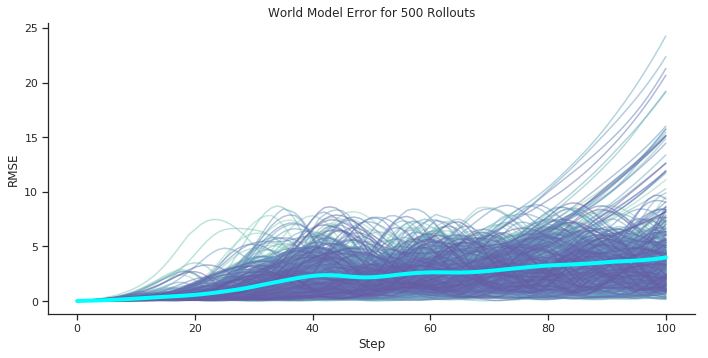

In [19]:
palette = sns.cubehelix_palette(n_colors=len(df["rollout"].unique()), start=1, rot=-.8, hue=1, dark=0.4, light=0.75)
rmse_plot = sns.relplot(x="step",
                y="rmse",
                hue="rollout",
                palette=palette,
                alpha=0.5,
                #height=5,
                aspect=2,
                kind="line",
                legend=False,
                data=df
               )#.set(title="World Model Error(500)", xlabel="Step", ylabel=r"RMSE")

sns.lineplot(x="step",
             y="rmse",
             linewidth=4,
             color="cyan",
             data=df_mean,
             ax=rmse_plot.ax
            ).set(title="World Model Error for 500 Rollouts", xlabel="Step", ylabel="RMSE")

In [21]:
rmse_plot.fig.savefig("graphics/rmse_plot.svg")
#rmse_plot

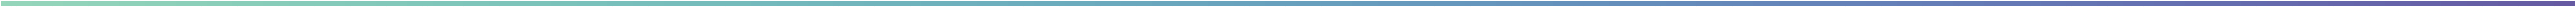

In [9]:
sns.palplot(sns.cubehelix_palette(n_colors=len(df["rollout"].unique()), start=1, rot=-.8, hue=1, dark=0.4, light=0.75))

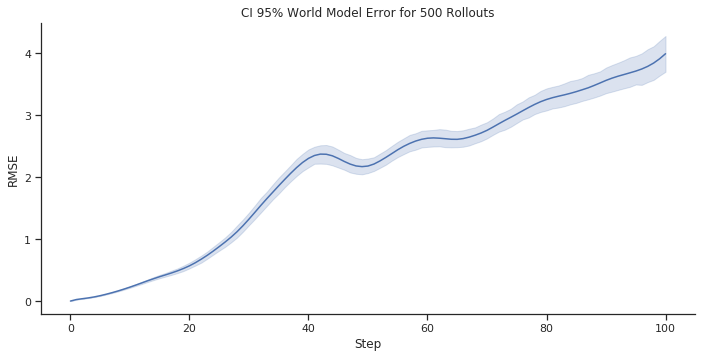

In [20]:
ci_rmse_plot = sns.relplot(x="step",
            y="rmse",
            kind="line",
            #units="rollout",
            #hue="rollout",
            ci=95,
            #estimator=None,
            #palette=sns.cubehelix_palette(n_colors=len(df["rollout"].unique()), start=1, rot=-.8, hue=1, dark=0.4, light=0.75),
            alpha=1,
            #height=5,
            aspect=2,
            data=df
           ).set(title="CI 95% World Model Error for 500 Rollouts", xlabel="Step", ylabel="RMSE")

In [22]:
ci_rmse_plot.fig.savefig("graphics/ci_rmse_plot.svg")

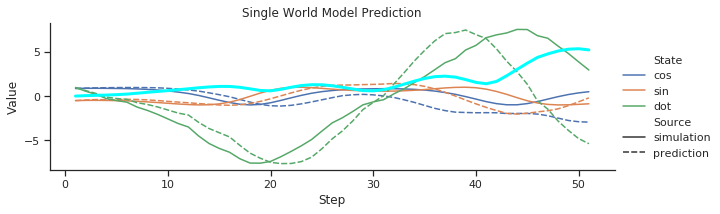

In [37]:
df_b, figure = planning_cases.single_rollout_error(wm, steps=50, visualize=True)
figure.set(title="Single World Model Prediction")

In [38]:
figure.fig.savefig("graphics/single_wm_prediction.svg")